In [1]:
import game
import sys
import random
import matplotlib.pyplot as plt
sys.setrecursionlimit(999999999)

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
epoch = 1000
previousState = (-1,-1,-1)
previousAction = 0
gamma = 0.8
Q = {}
scores = []
global score

In [3]:
def onJump(nextObstacleDist,nextObstacleHeight,nextObstacleWidth,frameRate):
    global previousState
    global previousAction
    previousState = (nextObstacleDist,nextObstacleHeight,nextObstacleWidth)
    prevousAction = 1

def onFrameChange(isJumping,nextObstacleDist,nextObstacleHeight,nextObstacleWidth,frameRate):
    global epoch
    global Q
    if isJumping:
        return
    global previousAction
    global previousState
    currentState = (nextObstacleDist,nextObstacleHeight,nextObstacleWidth)
    Q.setdefault(previousState,[0,0])
    #print(currentState)
    currentAction = 0
    if(currentState not in Q):
        Q[previousState][previousAction] = 0.5
        randomAction = random.randint(0,2)
        if randomAction == 1:
            game.jumpAction(onJump)
        else:
            previousAction = currentAction
            previousState = currentState
    else:
        Q.setdefault(currentState,[0,0])
        maxIndex = 0
        if(Q[currentState][1] > Q[currentState][0]):
            maxIndex = 1
        Q[previousState][previousAction] = 0.1 + gamma * Q[currentState][maxIndex]
        action = 1
        if(Q[currentState][1] < Q[currentState][0]):
            action = 0
        if(action==1):
            game.jumpAction(onJump)
        else:
            previousAction = currentAction
            previousState = currentState
        
    
def onCollide(score):
    global previousState
    global previousAction
    global epoch
    global Q
    global scores
    Q.setdefault(previousState,[0,0])
    Q[previousState][previousAction] += -1*gamma
    #if(epoch%100==0):
    #    print(Q)
    scores.append(score)
    if(epoch>-1):
        epoch-=1
        game.restart(onFrameChange,onCollide,onJump,onCrossedObstacle,scoreUpdated)
    else:
        return

def onCrossedObstacle(nextObstacleDist,nextObstacleHeight,nextObstacleWidth,frameRate):
    global previousState
    global previousAction
    Q.setdefault(previousState,[0,0])
    currentState = (nextObstacleDist,nextObstacleHeight,nextObstacleWidth)
    Q.setdefault(currentState,[0,0])
    maxIndex = 0
    if(Q[currentState][1] > Q[currentState][0]):
        maxIndex = 1
    Q[previousState][1] = 1 + gamma*Q[currentState][maxIndex]

def scoreUpdated(s):
    global score
    score = s

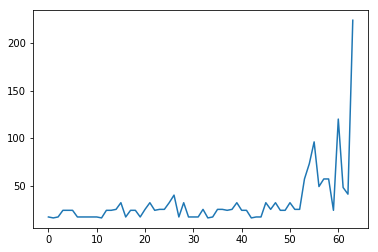

In [4]:
game.init()
game.startEnvironment(onFrameChange,onCollide,onJump,onCrossedObstacle,scoreUpdated)
plt.plot(scores)
plt.show()